# Sales Office

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import glob
from plotting import Prices, shades

In [2]:
prices = Prices()

Loaded 258 files


## Prices

In [3]:
aerospace = ['SEP','Luxury Jet','Jumbo','SOR','BFR','Satellite']

# as_prices = pd.read_excel('sc_finance.xlsx', sheet_name='Sales Office', skiprows=7, usecols=[0,1,2,4,6,8,10,12,14])
# as_prices.head()

In [4]:
# vs = as_prices['Date'].values
# for i in range(len(vs)):
#     if np.isnan(vs[i]):
#         vs[i] = vs[i-1]

In [5]:
# as_prices.rename(columns={'Date':'Time'}, inplace=True)
# as_prices['Bonus'] *= 100
# as_prices

In [6]:
#as_prices.to_hdf('salesoffice_legacy.hdf', 'test', mode='w')

### Load legacy sales office records

In [8]:
so_legacy = pd.read_hdf('SalesOfficePrices/salesoffice_legacy.hdf', 'test')
so_legacy.head()

,Time,Economy,SEP,Luxury Jet,Jumbo,SOR,BFR,Satellite,Bonus
0,2020-10-08,N0,44118.0,NaN,237426.0,NaN,NaN,NaN,2.14
1,2020-10-08,N0,44860.0,NaN,NaN,NaN,NaN,65867.0,1.65
2,2020-10-08,N0,45167.0,NaN,NaN,NaN,NaN,NaN,2.65
3,2020-10-08,N0,43412.0,92444.0,NaN,NaN,NaN,NaN,2.28
4,2020-10-08,N0,NaN,90471.0,NaN,NaN,NaN,64312.0,2.09


### Load OCR sales office records

In [9]:
df0 = pd.DataFrame(columns=['Time', 'Economy', 'Sin', 'Lux', 'Jum', 'Sub', 'BFR', 'Sat'])
hdfs = glob.glob('SalesOfficePrices/2*.hdf')
dfs = [pd.read_hdf(hdf, 'prices') for hdf in hdfs]
merged = pd.concat([df0] + dfs, join='outer')
mapper = {'Sin': 'SEP', 'Lux':'Luxury Jet', 'Jum': 'Jumbo', 'Sub': 'SOR', 'Sat': 'Satellite'}
merged.rename(columns=mapper, inplace=True)
merged

,Time,Economy,SEP,Luxury Jet,Jumbo,SOR,BFR,Satellite,Bonus
0,2021-02-19 09:52:26,N,NaN,84404.0,NaN,NaN,NaN,NaN,2.87
1,2021-02-19 09:52:26,N,42560.0,NaN,NaN,NaN,NaN,61092.0,2.70
2,2021-02-19 09:52:26,N,NaN,85167.0,NaN,NaN,NaN,62977.0,1.90
3,2021-02-19 09:52:26,N,NaN,84796.0,NaN,NaN,NaN,62086.0,2.18
0,2021-02-19 09:52:36,N,42785.0,NaN,NaN,NaN,NaN,63965.0,1.64
...,...,...,...,...,...,...,...,...,...
6,2021-02-27 15:14:59,N,43205.0,NaN,NaN,NaN,NaN,60943.0,1.06
7,2021-02-27 15:14:59,N,NaN,88422.0,NaN,NaN,NaN,62169.0,2.32
8,2021-02-27 15:14:59,N,41507.0,NaN,NaN,NaN,NaN,61964.0,2.01
9,2021-02-27 15:14:59,N,NaN,86549.0,NaN,NaN,NaN,NaN,2.30


In [10]:
as_prices = pd.concat([so_legacy, merged])
as_prices

,Time,Economy,SEP,Luxury Jet,Jumbo,SOR,BFR,Satellite,Bonus
0,2020-10-08 00:00:00,N0,44118.0,NaN,237426.0,NaN,NaN,NaN,2.14
1,2020-10-08 00:00:00,N0,44860.0,NaN,NaN,NaN,NaN,65867.0,1.65
2,2020-10-08 00:00:00,N0,45167.0,NaN,NaN,NaN,NaN,NaN,2.65
3,2020-10-08 00:00:00,N0,43412.0,92444.0,NaN,NaN,NaN,NaN,2.28
4,2020-10-08 00:00:00,N0,NaN,90471.0,NaN,NaN,NaN,64312.0,2.09
...,...,...,...,...,...,...,...,...,...
6,2021-02-27 15:14:59,N,43205.0,NaN,NaN,NaN,NaN,60943.0,1.06
7,2021-02-27 15:14:59,N,NaN,88422.0,NaN,NaN,NaN,62169.0,2.32
8,2021-02-27 15:14:59,N,41507.0,NaN,NaN,NaN,NaN,61964.0,2.01
9,2021-02-27 15:14:59,N,NaN,86549.0,NaN,NaN,NaN,NaN,2.30


In [11]:
nerf = np.datetime64('2020-11-26T00')

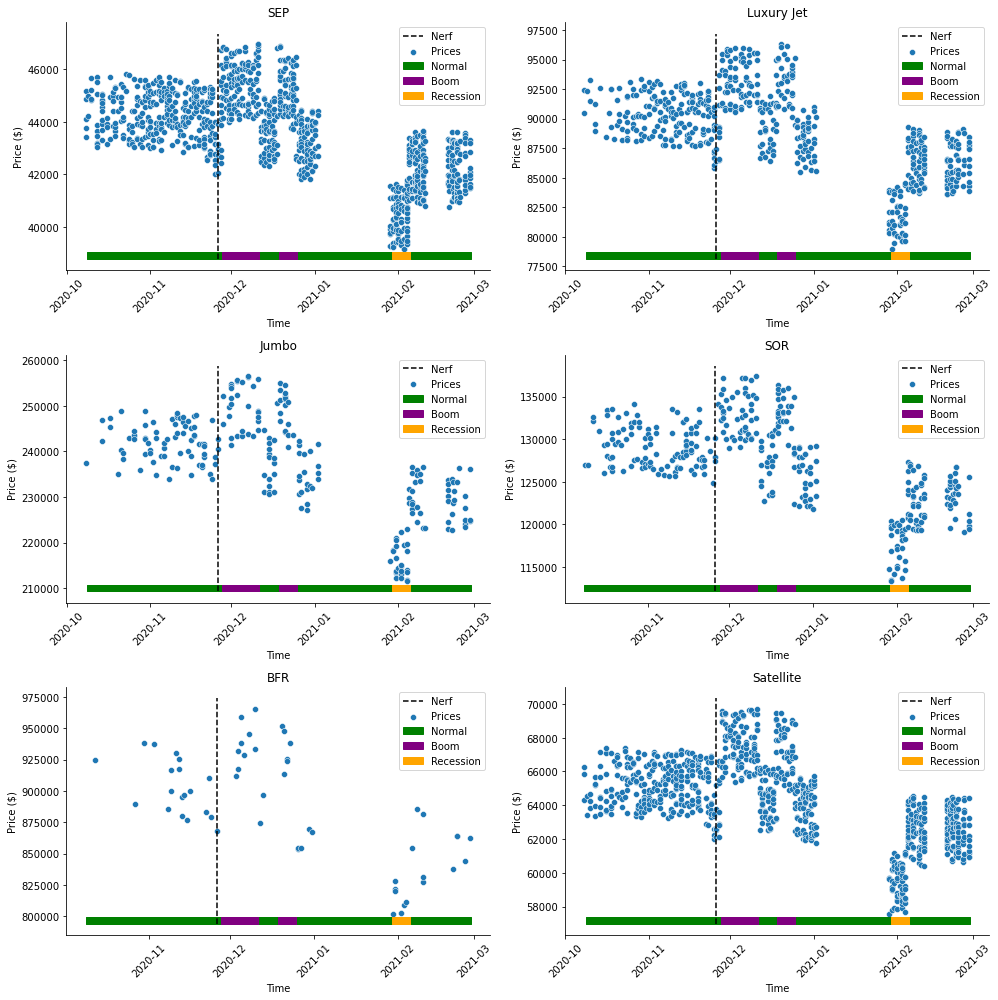

In [12]:
f, axs = plt.subplots(3, 2, figsize=(14,14))
axr = axs.ravel()
for commodity, ax in zip(aerospace, axr):
    sns.scatterplot(x='Time', y=commodity, label='Prices', data=as_prices, ax=ax)
    ax.set_ylabel('Price ($)')
    ax.set_title(commodity)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ylims = ax.get_ylim()    

    economy = prices.economy_history
    es, indices = np.unique([e[1] for e in prices.economy_history], return_index=True)
    ylim = ax.get_ylim()
    for i in range(len(economy) - 1):
        label = economy[i][1] if i in indices else None
        ax.fill_between([economy[i][0], economy[i+1][0]], ylim[0]*np.ones(2), 
            (0.03*ylim[1]+0.97*ylim[0])*np.ones(2), color=shades[economy[i][1]], label=label
        )

    ax.plot([nerf,nerf], ylims, 'k--', label='Nerf')
    ax.legend(loc='upper right')

plt.tight_layout()
sns.despine()

In [16]:
economy_labels = {'N0': 'Normal (pre-nerf)', 'N': 'Normal', 'R': 'Recession', 'B': 'Boom'}
as_prices['Economy'] = as_prices['Economy'].apply(lambda k: economy_labels[k])

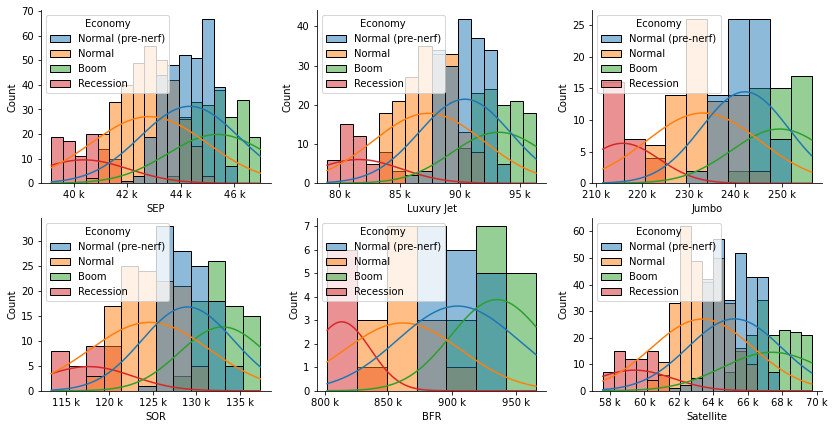

In [18]:
f, axs = plt.subplots(2, 3, figsize=(14,7))
axr = axs.ravel()
for commodity, ax in zip(aerospace, axr):
    try:
        sns.histplot(data=as_prices, x=commodity, hue='Economy', ax=ax, kde=True, kde_kws={'bw_method':2})
    except:
        sns.histplot(data=as_prices, x=commodity, hue='Economy', ax=ax)
    ax.xaxis.set_major_formatter(ticker.EngFormatter())

sns.despine()

f.savefig('sales_office.pdf')

## Bonus

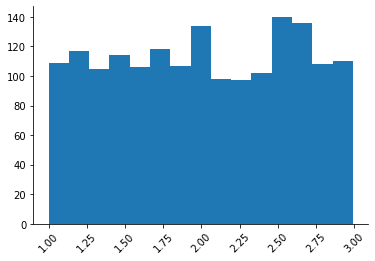

In [19]:
as_prices['Bonus'].hist(bins=15, xrot=45, grid=False)
sns.despine()

## Quantities

In [15]:
as_quantities = pd.read_excel('sc_finance.xlsx', sheet_name='Sales Office', skiprows=7, usecols=[1,3,5,7,9,11,13])
as_quantities.columns = ['Economy'] + aerospace
as_quantities.head()

,Economy,SEP,Luxury Jet,Jumbo,SOR,BFR,Satellite
0,N0,4,0,4,0,0,0
1,N0,4,0,0,0,0,3
2,N0,2,0,0,0,0,0
3,N0,4,1,0,0,0,0
4,N0,0,3,0,0,0,1


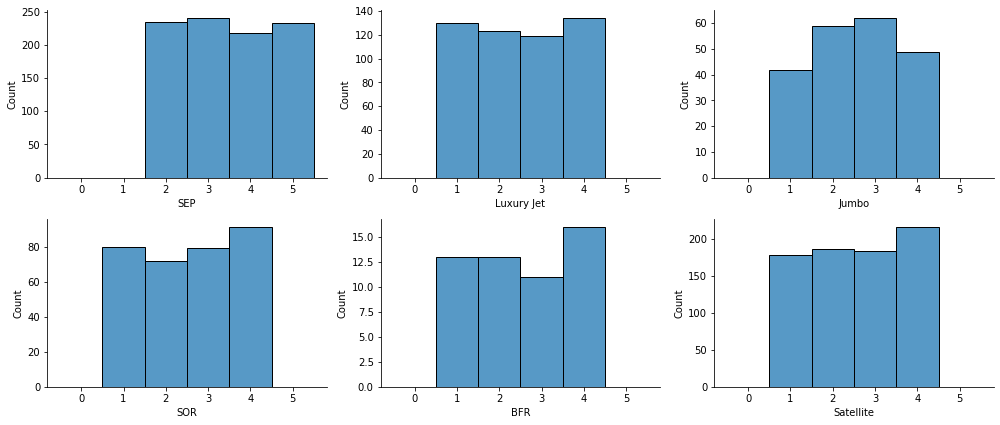

In [14]:
f, axs = plt.subplots(2, 3, figsize=(14,6))
axr = axs.ravel()
for commodity, ax in zip(aerospace, axr):
    positives = as_quantities[commodity] > 0
    sns.histplot(data = as_quantities[positives], x=commodity, ax=ax, bins=np.linspace(-0.5, 5.5, 7))
plt.tight_layout()
sns.despine()

**Conclusions.**
It seems that the quantity of each commodity is uniformly-distributed, but across slightly different supports. For SEP, it's uniform over {2, 3, 4, 5}, while for the others, it seems to be uniformly-distributed across {1, 2, 3, 4}.

## Frequencies

In [20]:
p = np.array([3.5, 2.5, 2.5, 2.5, 2.5, 2.5])
n = as_quantities.shape[0]
freq = [len(np.where(as_quantities[commodity]>0)[0])/n for commodity in aerospace]
plt.bar(x=aerospace, height=freq)
sns.despine()

levels_day = 65 / 2
df = pd.DataFrame()
df['Commodity'] = aerospace
df['Expected /d'] = freq * p * levels_day
df

NameError: name 'as_quantities' is not defined

## Stats

In [21]:
def get_stats(commodity, economy):
    x = as_prices[as_prices['Economy'] == economy][commodity]
    return [x.mean(), x.std()]

recession = [get_stats(commodity, 'Recession') for commodity in aerospace]
normal = [get_stats(commodity, 'Normal') for commodity in aerospace]
boom = [get_stats(commodity, 'Boom') for commodity in aerospace]

df = pd.DataFrame(np.hstack([recession, normal, boom]), columns=['Recession Mean','Recession Std. dev.','Normal Mean','Normal Std. dev.','Boom Mean','Boom Std. dev.'], index=aerospace)
df

,Recession Mean,Recession Std. dev.,Normal Mean,Normal Std. dev.,Boom Mean,Boom Std. dev.
SEP,40375.271739,743.646748,42811.898810,955.688344,45376.859155,825.418584
Luxury Jet,81677.551020,1560.600486,87384.308511,2033.209991,93244.078261,1701.050925
Jumbo,216076.851852,3427.991155,233183.613333,5415.606180,249492.836735,4569.505792
SOR,117471.322581,2283.928755,124655.538462,3040.592117,133084.202532,2201.713729
BFR,813653.428571,10033.280568,861116.071429,20312.088903,935492.800000,16179.036004
Satellite,59429.686567,979.033587,63375.304207,1300.728966,67420.176829,1281.588273


In [22]:
df['Boom Mean'] / df['Normal Mean']

SEP           1.059912
Luxury Jet    1.067057
Jumbo         1.069942
SOR           1.067616
BFR           1.086372
Satellite     1.063824
dtype: float64

In [23]:
df['Normal Mean'] / df['Recession Mean']

SEP           1.060349
Luxury Jet    1.069869
Jumbo         1.079170
SOR           1.061157
BFR           1.058333
Satellite     1.066391
dtype: float64

# Progress

In [24]:
progress = pd.read_excel('sc_finance.xlsx', sheet_name='Progress', skiprows=2)
progress.head()

,Date,Company Value (CV),Rank,Profit,CV (Eaglewai),Rank (Eaglewai),Profit (Eaglewai),CV (Buksi),Rank (Buksi),Profit (Buksi),Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,2020-05-31,65049.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-01,82221.0,NaN,17172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-02,110160.0,NaN,27939.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-03,113285.0,NaN,3125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-04,146970.0,NaN,33685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


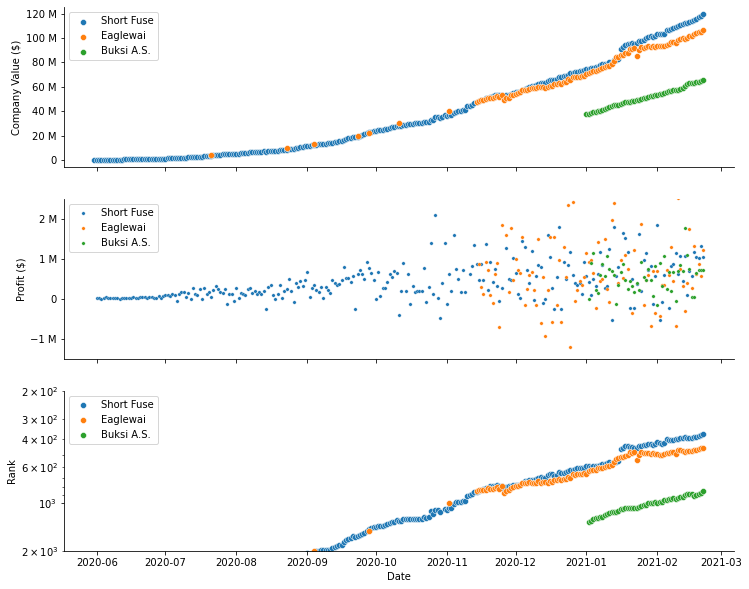

In [25]:
f, axs = plt.subplots(3, 1, sharex=True, figsize=(12,10))

sns.scatterplot(data=progress, x='Date', y='Company Value (CV)', label='Short Fuse', ax=axs[0])
sns.scatterplot(data=progress, x='Date', y='CV (Eaglewai)', label='Eaglewai', ax=axs[0])
sns.scatterplot(data=progress, x='Date', y='CV (Buksi)', label='Buksi A.S.', ax=axs[0])
axs[0].set_ylabel('Company Value ($)')
axs[0].yaxis.set_major_formatter(ticker.EngFormatter())

sns.scatterplot(data=progress, x='Date', y='Profit', s=12, label='Short Fuse', ax=axs[1])
sns.scatterplot(data=progress, x='Date', y='Profit (Eaglewai)', s=12, label='Eaglewai', ax=axs[1])
sns.scatterplot(data=progress, x='Date', y='Profit (Buksi)', s=12, label='Buksi A.S.', ax=axs[1])
axs[1].set_ylabel('Profit ($)')
axs[1].set_ylim(-1.5e6, 2.5e6)
axs[1].yaxis.set_major_formatter(ticker.EngFormatter())

sns.scatterplot(data=progress, x='Date', y='Rank', label='Short Fuse', ax=axs[2])
sns.scatterplot(data=progress, x='Date', y='Rank (Eaglewai)', label='Eaglewai', ax=axs[2])
sns.scatterplot(data=progress, x='Date', y='Rank (Buksi)', label='Buksi A.S.', ax=axs[2])
axs[2].set_ylim([200,2000])
axs[2].invert_yaxis()
axs[2].set_yscale('log')
axs[2].legend(loc='upper left')

sns.despine()